In [1]:
# 실습과제_if-else 문으로 간단한 결정트리 구현

def survival_classifier(seat_belt, highway, speed, age):
    
    if seat_belt==False:
        if highway==True:
            if speed > 100:
                if age > 50:
                    result = 1
                else:
                    result = 0
            else:
                result = 0
        else:
            reslt = 0
    else:
        result = 0
        
    return result

print(survival_classifier(False, True, 110, 55))
print(survival_classifier(True, False, 40, 70))
print(survival_classifier(False, True, 80, 25))
print(survival_classifier(False, True, 120, 60))
print(survival_classifier(True, False, 30, 20))

1
0
0
1
0


In [2]:
# Decision Tree by scikit-learn
# 지니불순도와 속성중요도를 사용해서 만들어짐

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

y = pd.DataFrame(iris_data.target, columns=['class'])


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

0.8666666666666667

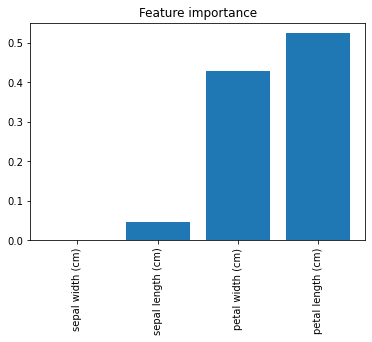

In [5]:
# scikit=learn으로 속성 중요도 확인하기
column_importances = model.feature_importances_

indices_sorted = np.argsort(column_importances)

plt.figure()
plt.title("Feature importance")
plt.bar(range(len(column_importances)), column_importances[indices_sorted])
plt.xticks(range(len(column_importances)), X.columns[indices_sorted], rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

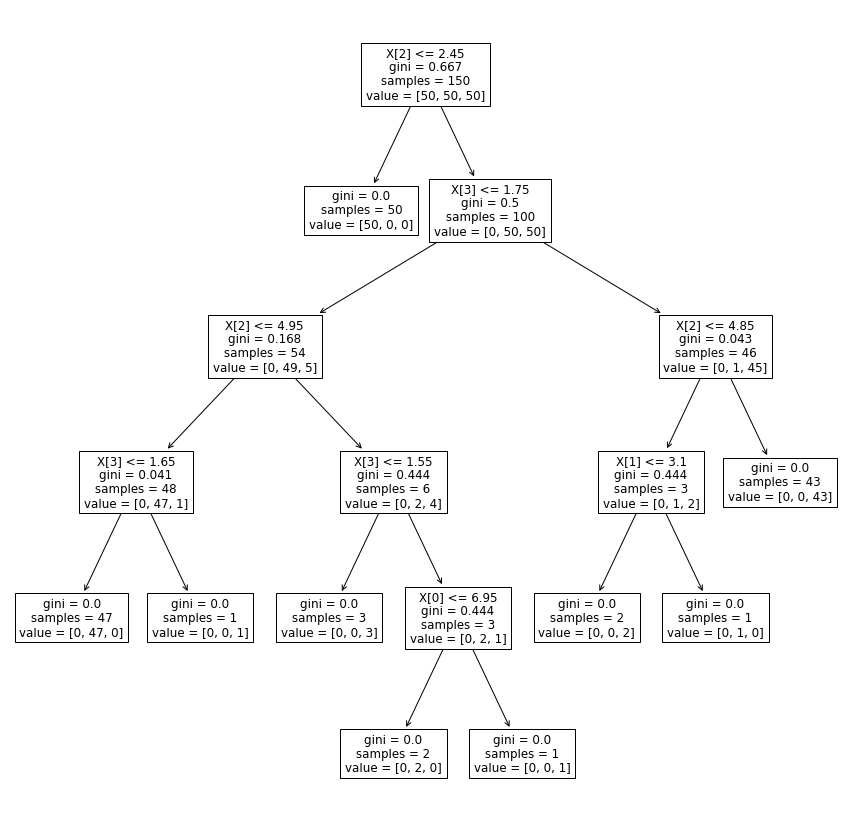

In [6]:
# 트리 구조 참고

from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=[15, 15])
tree.plot_tree(clf)
plt.show

In [7]:
# 실습과제_겨ㄹ정 트리로 악성/양성 유방암 분류하기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd

cancer_data = load_breast_cancer()

print(cancer_data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)

predictions, score

(array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1]),
 0.9473684210526315)